In [1]:
!git clone git://gonito.net/mieszkania5

fatal: destination path 'mieszkania5' already exists and is not an empty directory.


In [2]:
import pandas as pd

In [3]:
train = r'j:\Desktop\SysInf\mieszkania5\train\train.tsv'
train

'j:\\Desktop\\SysInf\\mieszkania5\\train\\train.tsv'

In [4]:
data=pd.read_csv(train, sep='\t', header=None)


In [5]:
data.columns

Index([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25],
      dtype='int64')

In [6]:
x_train = data[[0,6,8,19]]

In [7]:
x_train

0              6      8       19
0      309000.0              2  43.44     NaN
1      314900.0              2  42.60     NaN
2      249000.0              2  44.30  1960.0
3      419000.0              4     88     NaN
4      499000.0              3     77     NaN
...         ...            ...    ...     ...
2542   507600.0              4     94  1914.0
2543   342400.0              2  53.50  1999.0
2544   335000.0              3  55.25  1910.0
2545   260000.0              3     62  1930.0
2546  1990000.0  więcej niż 10    392     NaN

[2547 rows x 4 columns]

In [8]:
x_train = x_train.dropna()

In [9]:
x_train = x_train.replace( "więcej niż 10", '11')

In [10]:
x_train = x_train[(x_train[19] >= 1800) | (x_train[19] <= 2023)]


In [11]:
x_train = x_train.rename(columns = {0:"cena", 6:"pokoje", 8:"metraz", 19:"rok"})

In [12]:
x_train = x_train[x_train["metraz"] != '6 909']


In [13]:
x_train["pokoje"] = x_train["pokoje"].astype(float)
x_train["metraz"] = x_train["metraz"].astype(float)

In [14]:
x_train

cena  pokoje  metraz     rok
2     249000.0     2.0   44.30  1960.0
6     449000.0     4.0   92.00  1930.0
7     389000.0     3.0   63.60  1985.0
9     260000.0     3.0   44.20  1970.0
10    330682.0     3.0   48.99  2019.0
...        ...     ...     ...     ...
2541  383680.0     3.0   70.40  2016.0
2542  507600.0     4.0   94.00  1914.0
2543  342400.0     2.0   53.50  1999.0
2544  335000.0     3.0   55.25  1910.0
2545  260000.0     3.0   62.00  1930.0

[1767 rows x 4 columns]

In [15]:
from sklearn.linear_model import LinearRegression

In [16]:
x = x_train[["pokoje", "metraz", "rok"]]

In [17]:
y = x_train[["cena"]]

In [18]:
model = LinearRegression()

In [19]:
model.fit(x,y)

LinearRegression()

In [20]:
import matplotlib.pyplot as plt

In [26]:
model.coef_

array([[-3.54305400e+04,  7.47165498e+03, -2.77294899e+00]])

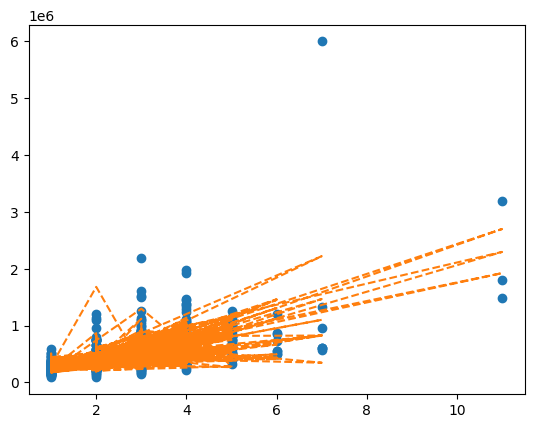

In [38]:
plt.plot(x["pokoje"],y, 'o')
plt.plot(x["pokoje"],model.predict(x), '--')

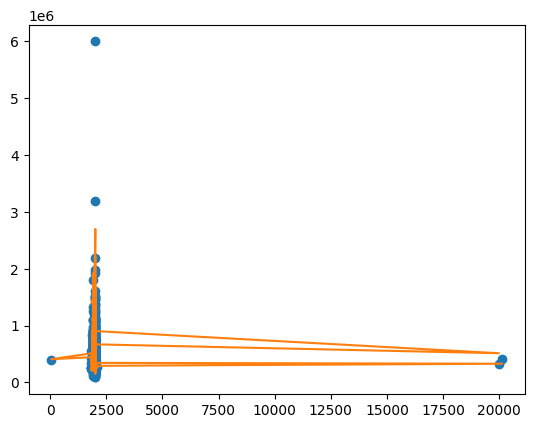

In [42]:
plt.plot(x["rok"],y, 'o')
plt.plot(x["rok"],model.predict(x), '-')

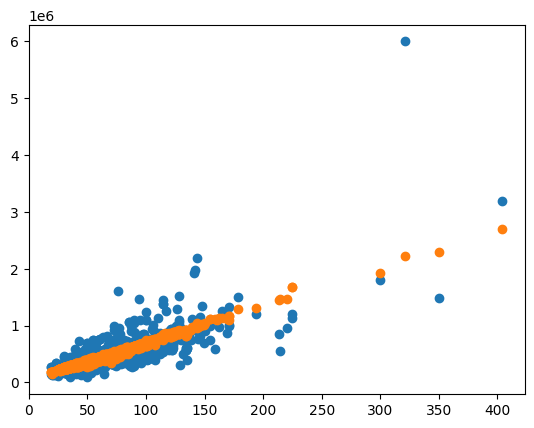

In [40]:
plt.plot(x["metraz"],y, 'o')
plt.plot(x["metraz"],model.predict(x), 'o')

In [41]:
model.predict(x)

array([[330020.67101959],
       [615640.72224431],
       [438723.7484912 ],
       ...,
       [398651.75187026],
       [376543.40054119],
       [426921.61270958]])